In [1]:
import pandas as pd
import numpy as np

# 히트맵 그려보기
# %amtplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv('C:/project22/raw_fire_weather_7yr.csv')

# condition = (weather.발생장소_시도 == '강원')
# weather[condition]

In [3]:
sanbul = weather[weather['산불발생여부'] == 1]

In [4]:
sanbul.head(1)

,산불발생여부,발생장소_시도,관측일,평균기온,일최고기온,일최고기온시각,일최저기온,일최저기온시각,일평균현지기압,일최고현지기압,...,진화종료시간_일,진화종료시간_시간,발생장소_관서,발생장소_시군구,발생장소_읍면,발생장소_동리,발생원인_구분,발생원인_세부원인,발생원인_기타,피해면적_합계
7,1,경북,20140104,1.15,7.679,1229.0,-4.086,995.5,1003.321,1005.2,...,4.0,16:10,경북,성주,초전,용봉,입,입산자 실화 추정,NaN,0.2


In [5]:
# sanbul['관측일'].str[4:6]

In [6]:
import matplotlib as mpl
# 현재 OS 내에 설치된 폰트를 확인합니다.
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

mpl.rc('font', family='Batang')

In [7]:
# conda install -c conda-forge fbprophet

<AxesSubplot:>

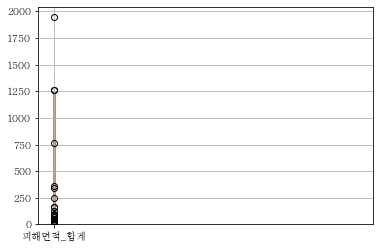

In [8]:

sanbul['피해면적_합계'].hist(bins=100)
sanbul['피해면적_합계'].hist(bins=100)
sanbul.boxplot(column = ['피해면적_합계'])

In [9]:
# 피처 각각에 대한 scaling을 수행하는 함수 정의

def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [10]:
sanbul.columns

Index(['산불발생여부', '발생장소_시도', '관측일', '평균기온', '일최고기온', '일최고기온시각', '일최저기온',
       '일최저기온시각', '일평균현지기압', '일최고현지기압', '일최고현지기압시각', '일최저현지기압', '일최저현지기압시각',
       '일평균해면기압', '일최고해면기압', '일최고해면기압시각', '일최저해면기압', '일최저해면기압시각', '일평균상대습도',
       '일최소상대습도', '일최소상대습도시각', '일평균수증기압', '일최고수증기압', '일최고수증기압시각', '일최저수증기압',
       '일최저수증기압시각', '일평균풍속', '일최대풍속', '일최대풍속시각', '일최대풍속풍향', '일최대순간풍속',
       '일최대순간풍속시각', '일최대순간풍속풍향', '풍정합', '일평균전운량', '일평균중하층운량', '최다운량', '최다운량시각',
       '일합계일조시간', '일합계일사량', '일평균지면온도', '발생일시_시간', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시군구', '발생장소_읍면',
       '발생장소_동리', '발생원인_구분', '발생원인_세부원인', '발생원인_기타', '피해면적_합계'],
      dtype='object')

In [11]:
scale_columns = ['평균기온', '일최고기온', '일최고기온시각', '일최저기온',
       '일최저기온시각', '일평균현지기압', '일최고현지기압', '일최고현지기압시각', '일최저현지기압', '일최저현지기압시각',
       '일평균해면기압', '일최고해면기압', '일최고해면기압시각', '일최저해면기압', '일최저해면기압시각', '일평균상대습도',
       '일최소상대습도', '일최소상대습도시각', '일평균수증기압', '일최고수증기압', '일최고수증기압시각', '일최저수증기압',
       '일최저수증기압시각', '일평균풍속', '일최대풍속', '일최대풍속시각', '일최대풍속풍향', '일최대순간풍속',
       '일최대순간풍속시각', '일최대순간풍속풍향', '풍정합', '일평균전운량', '일평균중하층운량', '최다운량', '최다운량시각',
       '일합계일조시간', '일합계일사량', '일평균지면온도', '피해면적_합계']
sanbul_df = standard_scaling(sanbul, scale_columns)

C:\Users\user\AppData\Local\Temp\ipykernel_12056\3834427884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)


In [15]:
# from fbprophet import Prophet

sanbul_df=sanbul_df.rename(columns={'피해면적_합계' : 'y'}, inplace = True)
# sanbul_df

In [13]:
sanbul.columns

Index(['산불발생여부', '발생장소_시도', '관측일', '평균기온', '일최고기온', '일최고기온시각', '일최저기온',
       '일최저기온시각', '일평균현지기압', '일최고현지기압', '일최고현지기압시각', '일최저현지기압', '일최저현지기압시각',
       '일평균해면기압', '일최고해면기압', '일최고해면기압시각', '일최저해면기압', '일최저해면기압시각', '일평균상대습도',
       '일최소상대습도', '일최소상대습도시각', '일평균수증기압', '일최고수증기압', '일최고수증기압시각', '일최저수증기압',
       '일최저수증기압시각', '일평균풍속', '일최대풍속', '일최대풍속시각', '일최대풍속풍향', '일최대순간풍속',
       '일최대순간풍속시각', '일최대순간풍속풍향', '풍정합', '일평균전운량', '일평균중하층운량', '최다운량', '최다운량시각',
       '일합계일조시간', '일합계일사량', '일평균지면온도', '발생일시_시간', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시군구', '발생장소_읍면',
       '발생장소_동리', '발생원인_구분', '발생원인_세부원인', '발생원인_기타', '피해면적_합계'],
      dtype='object')

In [17]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리합니다.
#'선수명', 'y'를 제외한 칼럼들은 X
X = sanbul[sanbul.columns.difference(['산불발생여부', '발생장소_시도', '발생일시_시간', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시군구', '발생장소_읍면',
       '발생장소_동리', '발생원인_구분', '발생원인_세부원인', '발생원인_기타','관측일', '피해면적_합계'])]

y = sanbul['피해면적_합계']

#검증(test)는 20%로 한다. = test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [18]:
# 회귀 분석 객체 생성(선형 회귀 모델 생성)
lr = linear_model.LinearRegression()

#fit()는 기울기와 절편을 전달하기 위함.
model = lr.fit(X_train, y_train)

# 학습된 계수를 출력합니다. -> 기울기
print(lr.coef_)

# 상수항을 출력합니다. -> wjfvus
print(lr.intercept_)

# 가장 영향도가 높은 계수

[ 3.69915041e-01 -3.32323373e-02  2.37706091e-01  2.86471232e-02
  2.69899414e-01  9.64205983e-02  2.48120071e-01 -1.24257410e-01
  2.86580043e-01  1.27933859e-01 -5.10563233e-02 -1.30760012e-01
 -9.91419204e-02 -6.51443320e-02  8.23699380e-02  3.87332090e-02
  6.87915832e-01 -3.56593451e-02  4.21518427e-01 -5.28703416e-02
  2.64761208e-01  3.41063643e-02  1.46486608e-03 -1.40768489e-02
 -1.63037529e-01 -7.34363343e-01 -1.11967440e-01 -7.63959238e-03
 -3.35607352e-01 -8.67129179e+00 -5.04287569e-01 -2.70255934e-01
  6.94124046e-02 -2.34413790e-02  3.30813749e-02  9.07638060e-03
 -6.34048497e-01  8.65139243e+00]
-0.01076503974962353


In [31]:
X.values

array([[-1.0607474 , -1.05031261, -0.6169541 , ..., -0.0696946 ,
        -1.08867918, -0.16342706],
       [-1.87472421, -5.14837039, -1.1948162 , ..., -1.04012171,
        -1.73258342,  2.47587635],
       [-1.89570972,  0.56261965, -1.26950704, ..., -1.18568578,
        -1.98288723, -0.99686838],
       ...,
       [-0.83708318, -0.44905316, -0.54657567, ..., -0.82524198,
        -0.7613767 ,  1.03769998],
       [-0.83708318, -0.44905316, -0.54657567, ..., -0.82524198,
        -0.7613767 ,  1.03769998],
       [-1.65106   ,  0.0409986 , -1.14668978, ...,  0.57601207,
        -1.45506255,  0.306152  ]])

In [32]:
# x_predicted = -0.01076503974962353
y_predicted=model.predict(X.values)
# x_predicted????

c:\bigdata\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
x_new=X_test
y_new=model.predict(x_new)

In [23]:
y_compare={'y_test':y_test, 'y_predicted':y_new}
pd.DataFrame(y_compare)

,y_test,y_predicted
3394,-0.080312,0.228866
4898,-0.067819,-0.091227
4178,-0.079429,0.420371
5068,-0.080312,-0.056408
924,-0.067819,0.163451
...,...,...
4999,1.474275,0.484019
4945,-0.076653,-0.205842
4717,-0.071605,0.165194
3404,-0.080186,0.056808


In [42]:
# mpl.rc('font', family='Batang')
# # plt.plot(y_compare, kind="bar")
# # plt.plot(y_compare)

# # plt.bar(range(len(y_compare)), list(y_compare.values()), align='center')
# # plt.xticks(range(len(y_compare)), list(y_compare.keys()))
# plt.bar(*zip(*y_compare.items()))
# plt.show()

In [43]:
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

# 1에 가까울수록 좋음

0.10177115196659581
0.0008376226747789373


In [44]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

0.7659001071592433
1.5427618009511994


In [ ]:
sanbul_df

In [ ]:
scale_columns = ['평균기온', '일최고기온', '일최고기온시각', '일최저기온',
       '일최저기온시각', '일평균현지기압', '일최고현지기압', '일최고현지기압시각', '일최저현지기압', '일최저현지기압시각',
       '일평균해면기압', '일최고해면기압', '일최고해면기압시각', '일최저해면기압', '일최저해면기압시각', '일평균상대습도',
       '일최소상대습도', '일최소상대습도시각', '일평균수증기압', '일최고수증기압', '일최고수증기압시각', '일최저수증기압',
       '일최저수증기압시각', '일평균풍속', '일최대풍속', '일최대풍속시각', '일최대풍속풍향', '일최대순간풍속',
       '일최대순간풍속시각', '일최대순간풍속풍향', '풍정합', '일평균전운량', '일평균중하층운량', '최다운량', '최다운량시각',
       '일합계일조시간', '일합계일사량', '일평균지면온도', '피해면적_합계']

In [ ]:
sanbul_df_corr=sanbul_df[['평균기온', '일최고기온', '일최고기온시각', '일최저기온',
       '일최저기온시각', '일평균현지기압', '일최고현지기압', '일최고현지기압시각', '일최저현지기압', '일최저현지기압시각',
       '일평균해면기압', '일최고해면기압', '일최고해면기압시각', '일최저해면기압', '일최저해면기압시각', '일평균상대습도',
       '일최소상대습도', '일최소상대습도시각', '일평균수증기압', '일최고수증기압', '일최고수증기압시각', '일최저수증기압',
       '일최저수증기압시각', '일평균풍속', '일최대풍속', '일최대풍속시각', '일최대풍속풍향', '일최대순간풍속',
       '일최대순간풍속시각', '일최대순간풍속풍향', '풍정합', '일평균전운량', '일평균중하층운량', '최다운량', '최다운량시각',
       '일합계일조시간', '일합계일사량', '일평균지면온도', '피해면적_합계']]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(picher_df_corr.values, i) for i in range(picher_df_corr.shape[1])]
vif["features"] = picher_df_corr.columns
vif